### Переобучение и недообучение решающего дерева

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import numpy as np

Решаем задачу предсказания уровня трат покупателя по его входным данным:
- id покупателя
- пол покупателя
- возраст покупателя
- годовой доход покупателя

[Данные можно найти тут](https://www.kaggle.com/datasets/shwetabh123/mall-customers?resource=download)

In [2]:
# загружаем данные
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# посмотрим тип данных и нет ли пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# отделяем признаки
features = df[['Genre', 'Age', 'Annual Income (k$)']].copy()
features['Genre'] = (features['Genre'] == 'Male') * 1
features.head()

,Genre,Age,Annual Income (k$)
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17


In [5]:
# отделяем целевую переменную
target = df['Spending Score (1-100)']

In [6]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

Обучим очень сложное дерево

In [7]:
model = DecisionTreeRegressor(min_samples_leaf=1, random_state=1)

model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Качество на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Качество на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

Качество на обучающей выборке: 0.6266666666666667
Качество на валидационной выборке: 19.0


In [8]:
model.get_depth()

17

Понаблюдаем как меняются ошибки в зависимости от сложности алгоритма

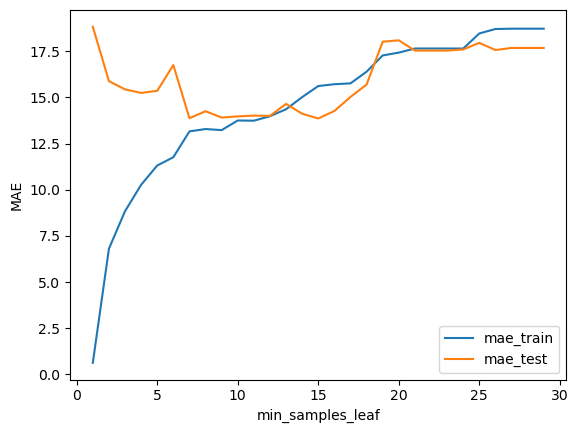

In [9]:
res = []
for param in range(1, 30, 1):
    model = DecisionTreeRegressor(min_samples_leaf=param, random_state=42)

    model.fit(features_train, target_train)
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    res.append([param, mean_absolute_error(pred_train, target_train), mean_absolute_error(pred_test, target_test)])
    
res_pd = pd.DataFrame(res, columns=['min_samples_leaf', 'mae_train', 'mae_test'])

res_pd.set_index('min_samples_leaf')['mae_train'].plot(label='mae_train')
res_pd.set_index('min_samples_leaf')['mae_test'].plot(label='mae_test')
plt.legend()
plt.ylabel('MAE');

In [10]:
res_pd[res_pd['mae_test'] == res_pd['mae_test'].min()]

,min_samples_leaf,mae_train,mae_test
14,15,15.61128,13.854993


### Случайный лес

In [11]:
from sklearn.ensemble import RandomForestRegressor

Решаем задачу оценки качества вина по 10-бальной шкале в зависимости от результатов замеров некоторых показателей (остаточный сахар, кислотность, крепость и др)  
[Данные можно найти тут](https://archive.ics.uci.edu/dataset/186/wine+quality)

In [12]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
features = df.drop(['quality'], axis=1)
target = df['quality']

In [15]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

Выберем лучшее дерево

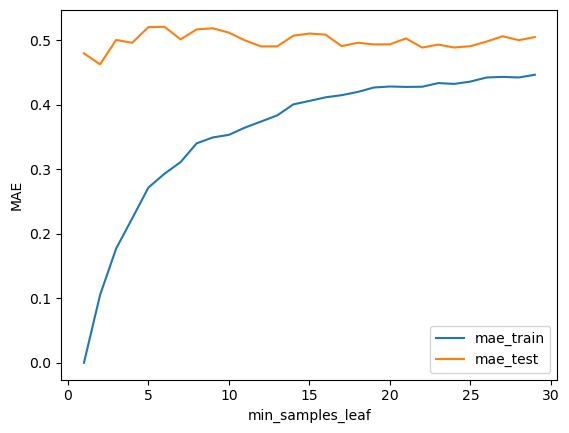

In [16]:
res = []
for param in range(1, 30, 1):
    model = DecisionTreeRegressor(min_samples_leaf=param, random_state=7)

    model.fit(features_train, target_train)
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    res.append([param, mean_absolute_error(pred_train, target_train), mean_absolute_error(pred_test, target_test)])
    
res_pd = pd.DataFrame(res, columns=['min_samples_leaf', 'mae_train', 'mae_test'])

res_pd.set_index('min_samples_leaf')['mae_train'].plot(label='mae_train')
res_pd.set_index('min_samples_leaf')['mae_test'].plot(label='mae_test')
plt.legend()
plt.ylabel('MAE');

In [17]:
res_pd[res_pd['mae_test'] == res_pd['mae_test'].min()]

,min_samples_leaf,mae_train,mae_test
1,2,0.105088,0.462917


Увеличим число деревьев

In [18]:
model = RandomForestRegressor(n_estimators=5, min_samples_leaf=2, random_state=7)

model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

Ошибка на обучающей выборке: 0.23516025259144524
Ошибка на валидационной выборке: 0.4569750000000001


Попробуем обучить много деревьев

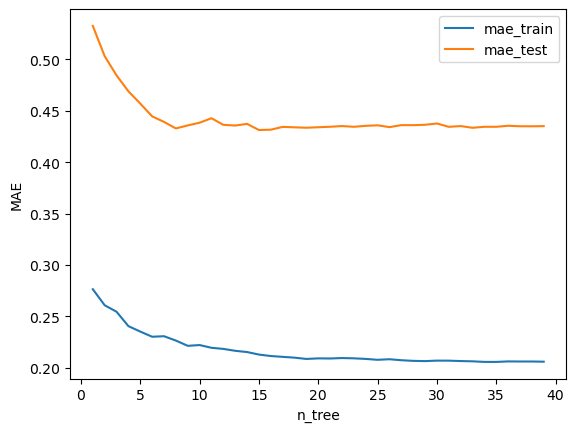

In [19]:
res = []
for n_tree in range(1, 40):
    model = RandomForestRegressor(n_estimators=n_tree, min_samples_leaf=2, random_state=7)

    model.fit(features_train, target_train)
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    res.append([n_tree, mean_absolute_error(pred_train, target_train), mean_absolute_error(pred_test, target_test)])

res_pd = pd.DataFrame(res, columns=['n_tree', 'mae_train', 'mae_test'])

res_pd.set_index('n_tree')['mae_train'].plot(label='mae_train')
res_pd.set_index('n_tree')['mae_test'].plot(label='mae_test')
plt.legend()
plt.ylabel('MAE');

In [20]:
res_pd[res_pd['mae_test'] == res_pd['mae_test'].min()]

,n_tree,mae_train,mae_test
14,15,0.212802,0.431253


### Градиентный бустинг

In [21]:
from xgboost import XGBRegressor

In [22]:
features_train_xgb, features_val, target_train_xgb, target_val = train_test_split(features_train, target_train, test_size=0.15, random_state=42)

Что будет, если захотеть сэкономить на времени обучения и пойти к решению очень большими шагами.

[0]	validation_0-rmse:20.57478	validation_1-rmse:20.64659
[1]	validation_0-rmse:81.83982	validation_1-rmse:81.42912
[2]	validation_0-rmse:325.76412	validation_1-rmse:324.80495
[3]	validation_0-rmse:1296.78205	validation_1-rmse:1292.16228
[4]	validation_0-rmse:5162.23177	validation_1-rmse:5144.12500
[5]	validation_0-rmse:20550.07844	validation_1-rmse:20475.68156
[6]	validation_0-rmse:81807.81636	validation_1-rmse:81505.96295
[7]	validation_0-rmse:325956.63983	validation_1-rmse:323668.64631
[8]	validation_0-rmse:1298939.66398	validation_1-rmse:1290904.91114
[9]	validation_0-rmse:5176334.34431	validation_1-rmse:5143382.76438
Ошибка MAE на обучающей выборке: 5149651.211144785
Ошибка MAE на валидационной выборке: 5112360.867062989


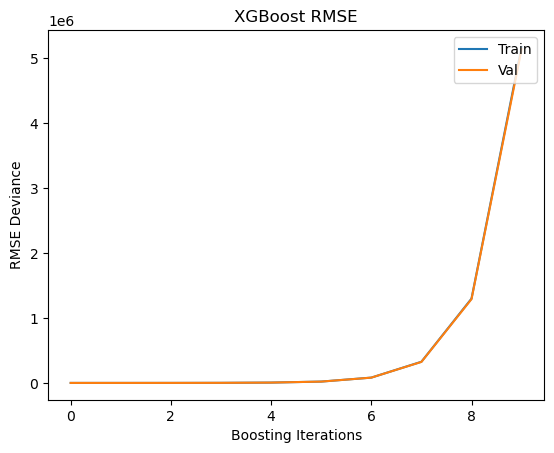

In [23]:
model = XGBRegressor(n_estimators=10, max_depth=3, learning_rate=5)

model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_val, target_val)])
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка MAE на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка MAE на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['rmse'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['rmse'], label='Val')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");

Что будет, если обучать сложные модели на каждом шаге.

[0]	validation_0-rmse:1.24813	validation_1-rmse:1.18308
[1]	validation_0-rmse:0.52983	validation_1-rmse:0.74586
[2]	validation_0-rmse:0.33364	validation_1-rmse:0.74794
[3]	validation_0-rmse:0.24635	validation_1-rmse:0.73200
[4]	validation_0-rmse:0.14453	validation_1-rmse:0.75059
[5]	validation_0-rmse:0.08869	validation_1-rmse:0.75251
[6]	validation_0-rmse:0.06622	validation_1-rmse:0.75066
[7]	validation_0-rmse:0.04392	validation_1-rmse:0.74951
[8]	validation_0-rmse:0.03765	validation_1-rmse:0.74931
[9]	validation_0-rmse:0.02630	validation_1-rmse:0.74875
Ошибка MAE на обучающей выборке: 0.09079155353231168
Ошибка MAE на валидационной выборке: 0.512233680486679


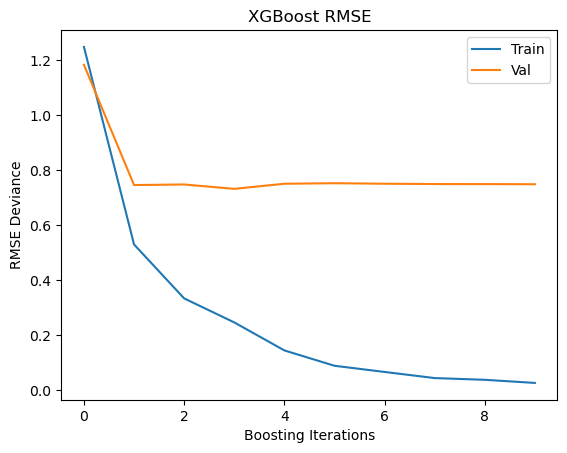

In [24]:
model = XGBRegressor(n_estimators=10, max_depth=10, learning_rate=0.8)

model.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка MAE на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка MAE на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['rmse'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['rmse'], label='Val')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");

Чтобы избежать переобучения, попробуем взять поменьше шаг, и обучать несложные модели

[0]	validation_0-rmse:4.75197	validation_1-rmse:4.62341
[1]	validation_0-rmse:4.33501	validation_1-rmse:4.20966
[2]	validation_0-rmse:3.95623	validation_1-rmse:3.83357
[3]	validation_0-rmse:3.61162	validation_1-rmse:3.49141
[4]	validation_0-rmse:3.29872	validation_1-rmse:3.18208
[5]	validation_0-rmse:3.01433	validation_1-rmse:2.90123
[6]	validation_0-rmse:2.75648	validation_1-rmse:2.64737
[7]	validation_0-rmse:2.52248	validation_1-rmse:2.41652
[8]	validation_0-rmse:2.31049	validation_1-rmse:2.20905
[9]	validation_0-rmse:2.11827	validation_1-rmse:2.02128
[10]	validation_0-rmse:1.94427	validation_1-rmse:1.85131
[11]	validation_0-rmse:1.78667	validation_1-rmse:1.69852
[12]	validation_0-rmse:1.64424	validation_1-rmse:1.56316
[13]	validation_0-rmse:1.51575	validation_1-rmse:1.44212
[14]	validation_0-rmse:1.39998	validation_1-rmse:1.33392
[15]	validation_0-rmse:1.29513	validation_1-rmse:1.23819
[16]	validation_0-rmse:1.20128	validation_1-rmse:1.15563
[17]	validation_0-rmse:1.11726	validation

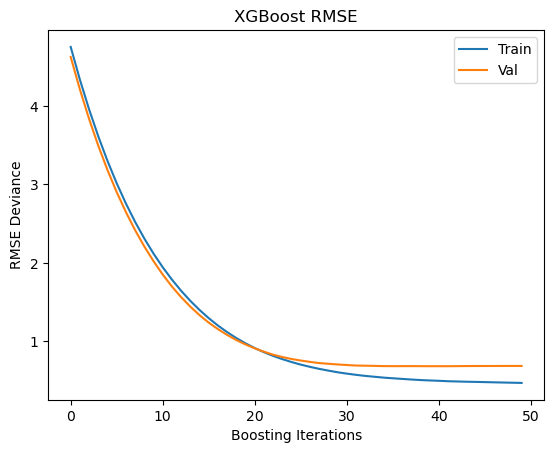

In [25]:
model = XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.09)

model.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['rmse'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['rmse'], label='Val')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");